Poisson spike trains

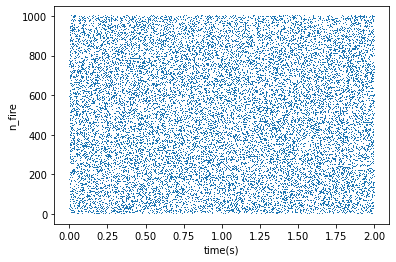

average=9.9665


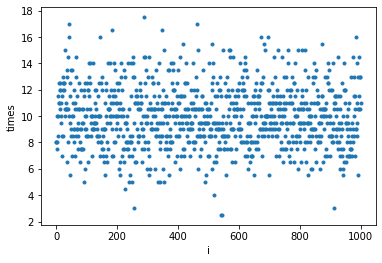

In [1]:
import numpy as np
import matplotlib.pyplot as plt

V_th=1
dt=1E-4 #s
tau=2E-2 #s
N=1000 
K=100
r_x=10 #Hz

S_j=np.random.binomial(1,r_x*dt,(N,20000))/dt

time=[]
n_fire=[]
times=[]
n=[]

for i in range(N):
    for k in range(20000):
        if S_j[i][k]==1/dt:
             time.append(k*dt)
             n_fire.append(i)
    times.append(sum(S_j[i]*dt)/2)
    n.append(i)    

#plt.figure(figsize=(50,20))
plt.plot(time,n_fire,',')
plt.xlabel("time(s)")
plt.ylabel("n_fire")
plt.show()

print(f"average={np.mean(times)}")

plt.plot(n,times,'.')
plt.xlabel("i")
plt.ylabel("times")
plt.show()


Single LIF neuron with one input spike train

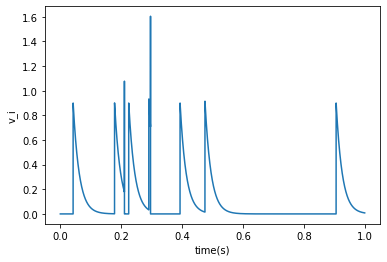

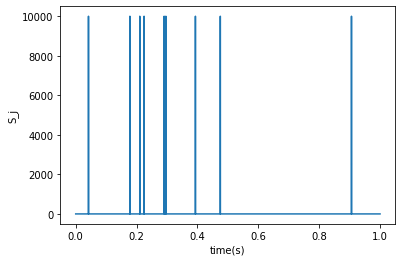

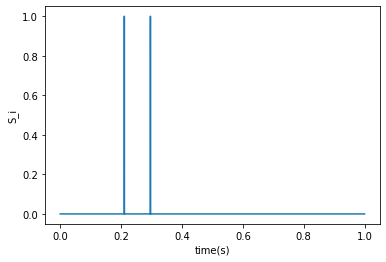

In [4]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

V_th=1 
dt=1E-4 #s
tau=2E-2 #s
N=1000 
K=100
r_x=10 #Hz
w=0.9


v_i=[]
S_j=np.random.binomial(1,r_x*dt,10000)/dt
S_i=[]
time=[]
v_i.append(0)
S_i.append(0)

for k in range(10000):    
    
    time.append(k*dt)

    if k!=9999:
        if v_i[k]>V_th :
            v_i.append(0)
            S_i.append(1)  

        else:
            v_i.append(v_i[k]+dt*(-v_i[k]/tau+w*S_j[k]))
            S_i.append(0)


plt.plot(time,v_i)
plt.xlabel("time(s)")
plt.ylabel("v_i")
#plt.ylim(ymax=1.2)
plt.show()

plt.plot(time,S_j)
plt.xlabel("time(s)")
plt.ylabel("S_j")
plt.show()

plt.plot(time,S_i)
plt.xlabel("time(s)")
plt.ylabel("S_i")
plt.show()

Single LIF neuron with mant input spike trains<br>
1.

mu_ex=0.19427697451258144
mu_th=0.2
sigma_ex=0.001158455272110572
sigma_th=0.001


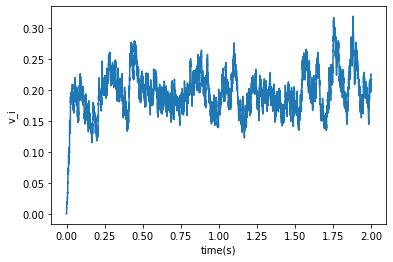

In [5]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


V_th=1
dt=1E-4 #s
tau=2E-2 #s
N=1000 
K=100
r_x=10 #Hz
w=1

v_i=[]
time=[]
v_i_sta=[]
v_i.append(0)

S_j_sum=np.random.binomial(K,r_x*dt,size=20000)/dt



def find_ex(K):
    for k in range(20000):

        if k!=19999:
            v_i.append(v_i[k]+dt*(-v_i[k]/tau+w*S_j_sum[k]/K))
        time.append(k*dt)

        if k>1000:
            v_i_sta.append(v_i)

    return np.mean(v_i_sta),np.var(v_i_sta)

mu_ex,sigma_ex=find_ex(K)
mu_th=tau*w*r_x
sigma_th=w**2*r_x*tau/K/2

print(f"mu_ex={mu_ex}")
print(f"mu_th={mu_th}")
print(f"sigma_ex={sigma_ex}")
print(f"sigma_th={sigma_th}")
    
plt.plot(time,v_i)
plt.xlabel("time(s)")
plt.ylabel("v_i")
plt.show()



2.

In [4]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


V_th=1
dt=1E-4 #s
tau=2E-2 #s
N=1000 
r_x=10 #Hz
w=1

K=np.zeros(10000)
mu_ex=np.zeros(10000)
mu_th=np.zeros(10000)
sigma_ex=np.zeros(10000)
sigma_th=np.zeros(10000)

v_i=np.zeros(10000)
v_i_sta=np.zeros(10000)
v_i[0]=0


def find_ex(K):

    S_j_sum=np.random.binomial(K,r_x*dt,size=10000)/dt
    
    for k in range(10000):

        if k!=9999:
            v_i[k+1]=v_i[k]+dt*(-v_i[k]/tau+w*S_j_sum[k]/K)

        if k>=1000:
            v_i_sta[k-1000]=v_i

    return np.mean(v_i_sta),np.var(v_i_sta)

for i in range(10):
    K[i]=i+1

    mu,sigma=find_ex(K[i])

    mu_ex[i]=(mu)
    mu_th[i]=(tau*w*r_x)
    sigma_ex[i]=(sigma)
    sigma_th[i]=(w**2*r_x*tau/K[i]/2)



plt.plot(K,mu_ex,'b',label="experimental")
plt.plot(K,mu_th,'r',label="theoretical")
plt.xlabel("K")
plt.ylabel("mu")
plt.ylim(ymin=0,ymax=0.4)
plt.show()

plt.plot(K,sigma_ex,'b',label="experimental")
plt.plot(K,sigma_th,'r',label="theoretical")
plt.xlabel("K")
plt.ylabel("sigma^2")
plt.ylim(ymin=0,ymax=0.01)
plt.show()



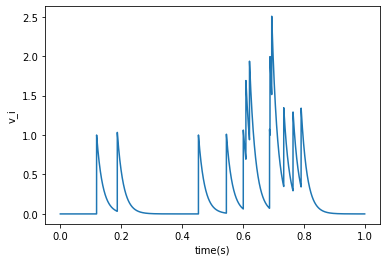

mu_ex=0.25999924017010434
mu_th=0.2
sigma_ex=0.1685999477401528
sigma_th=0.1


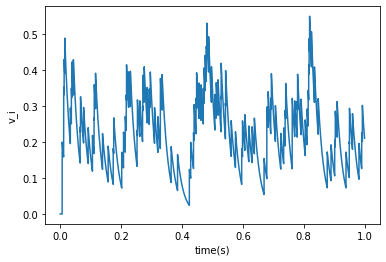

mu_ex=0.22181320056765275
mu_th=0.2
sigma_ex=0.009266244984762445
sigma_th=0.01


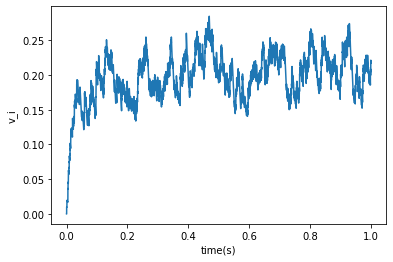

mu_ex=0.1962835603691956
mu_th=0.2
sigma_ex=0.0011823123847642869
sigma_th=0.001


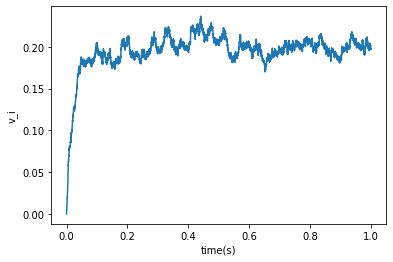

mu_ex=0.1948726048074174
mu_th=0.2
sigma_ex=0.0005336134351370436
sigma_th=0.0001
0.04489552963620415
0.027775


In [3]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


V_th=1
dt=1E-4 #s
tau=2E-2 #s
N=1000 
r_x=10 #Hz
w=1

K=[1,10,100,1000]
mu_ex=[]
mu_th=[]
sigma_ex=[]
sigma_th=[]


def find_ex(K):
    
    time=[]
    v_i=[]
    v_i_sta=[]
    v_i.append(0)

    S_j_sum=np.random.binomial(K,r_x*dt,size=10000)/dt
    
    for k in range(10000):

        if k!=9999:
            v_i.append(v_i[k]+dt*(-v_i[k]/tau+w*S_j_sum[k]/K))
        time.append(k*dt)

        if k>1000:
            v_i_sta.append(v_i)

    plt.plot(time,v_i,label="K={K}")
    plt.xlabel("time(s)")
    plt.ylabel("v_i")
    plt.show()

    return np.mean(v_i_sta),np.var(v_i_sta)



for i in range(4):

    mu,sigma=find_ex(K[i])

    mu_ex.append(mu)
    mu_th.append(tau*w*r_x)
    sigma_ex.append(sigma)
    sigma_th.append(w**2*r_x*tau/K[i]/2)

    print(f"mu_ex={mu_ex[i]}")
    print(f"mu_th={mu_th[i]}")
    print(f"sigma_ex={sigma_ex[i]}")
    print(f"sigma_th={sigma_th[i]}")

print(np.mean(sigma_ex))
print(np.mean(sigma_th))


3.

0.965284039521982


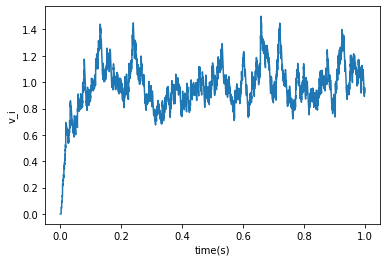

In [25]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


V_th=1
dt=1E-4 #s
tau=2E-2 #s
N=1000 
r_x=10 #Hz
w=5
K=100
    
time=[]
v_i=[]
v_i_sta=[]
v_i.append(0)

S_j_sum=np.random.binomial(K,r_x*dt,size=10000)/dt

for k in range(10000):

    if k!=9999:
        v_i.append(v_i[k]+dt*(-v_i[k]/tau+w*S_j_sum[k]/K))
    time.append(k*dt)

    if k>1000:
        v_i_sta.append(v_i)

mu=np.mean(v_i_sta)
print(mu)

plt.plot(time,v_i)
plt.xlabel("time(s)")
plt.ylabel("v_i")
plt.show()


4.

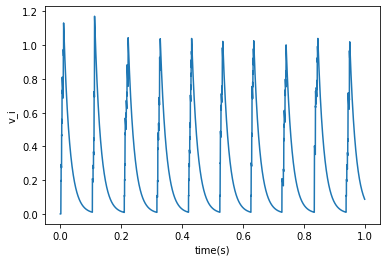

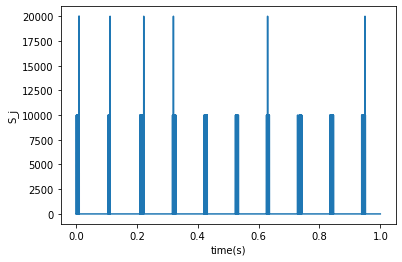

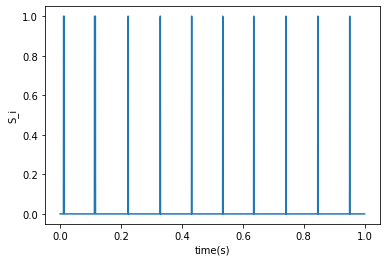

10<=w<=99


In [103]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

V_th=1 
dt=1E-4 #s
tau=2E-2 #s
N=1000 
K=100
r_x=10 #Hz
w=10


v_i=[]
S_j=np.random.binomial(K,r_x*dt,10000)/dt
S_i=[]
time=[]
v_i.append(0)

f=0 #标记

for k in range(10000):   

    time.append(k*dt) 
    
    if f==1:
        if v_i[k]<1E-2:
            f=0
        else:
            S_j[k]=0
    
    if k!=9999:
        v_i.append(v_i[k]+dt*(-v_i[k]/tau+w*S_j[k]/K))        

    if v_i[k]>V_th :
        S_i.append(1)
        f=1
                 
    else:
        S_i.append(0)

plt.plot(time,v_i)
plt.xlabel("time(s)")
plt.ylabel("v_i")
plt.show()

plt.plot(time,S_j)
plt.xlabel("time(s)")
plt.ylabel("S_j")
plt.show()

plt.plot(time,S_i)
plt.xlabel("time(s)")
plt.ylabel("S_i")
plt.show()

print("10<=w<=99")